In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data

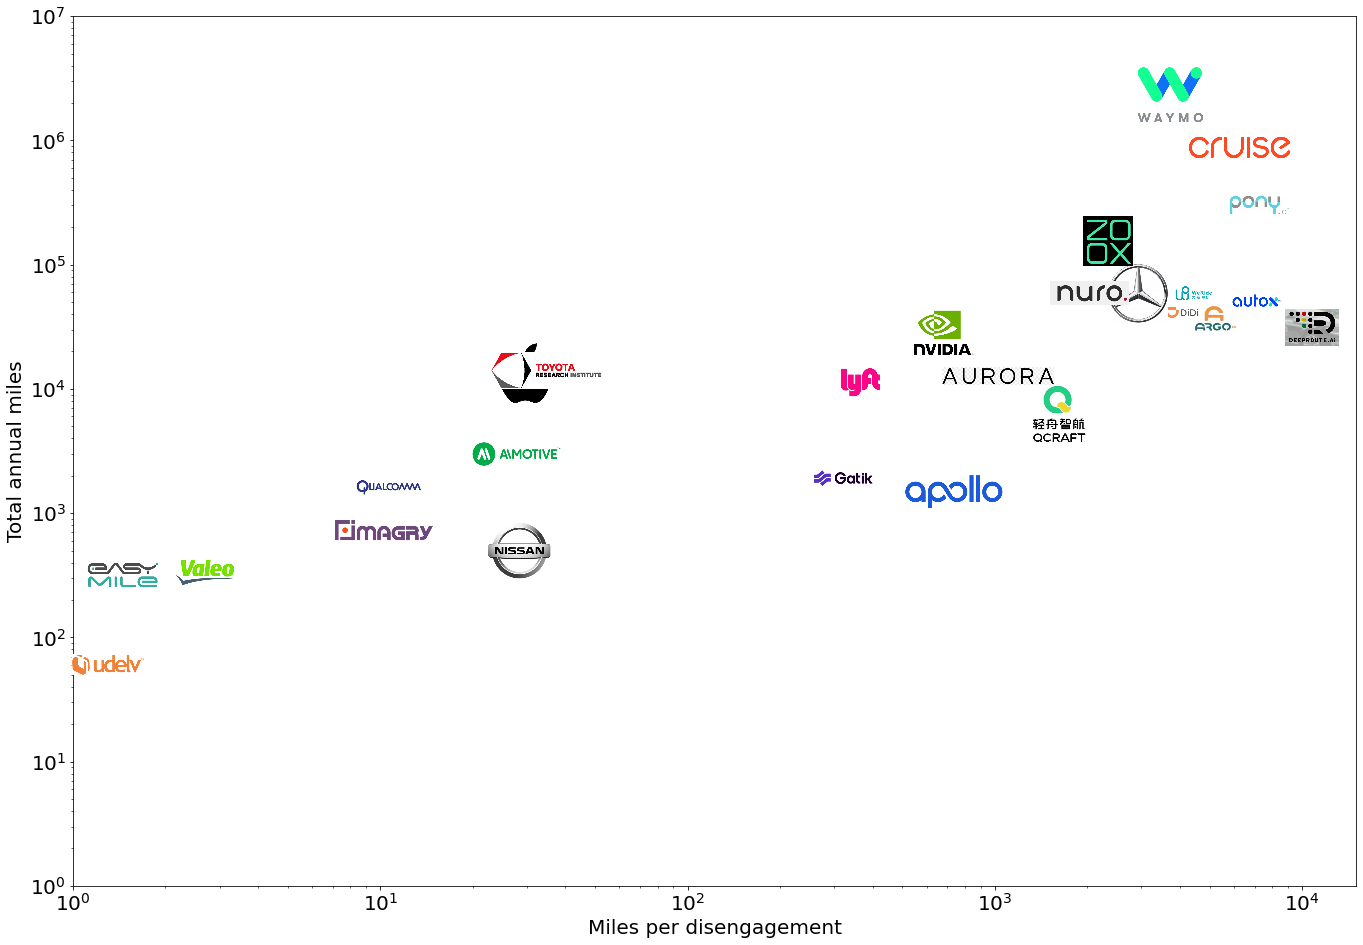

In [237]:
### Calculate miles per disengagement (MPD) for each vehicle first and then average MPDs over all vehicles of that company

def data_processing(df):
    df['ANNUAL TOTAL'] = [item.replace(' ', '') for item in df['ANNUAL TOTAL']]
    df['ANNUAL TOTAL'] = [item.replace(',', '') for item in df['ANNUAL TOTAL']]
    df['ANNUAL TOTAL'] = df['ANNUAL TOTAL'].astype('float')
    df['miles per disengagement'] = df['ANNUAL TOTAL'] / df['Annual Total of Disengagements']
    df['miles per disengagement'].replace(np.inf, np.nan, inplace=True)
    df['miles per disengagement'] = df['miles per disengagement'].fillna(df['ANNUAL TOTAL'])
    df.drop(df[(df['Annual Total of Disengagements'] == 0) & (df['ANNUAL TOTAL'] == 0)].index, inplace = True)
    disengagement = df.groupby(['Manufacturer']).agg({'VIN NUMBER': 'count', 'ANNUAL TOTAL': 'sum', 'miles per disengagement': 'mean'})

    return disengagement


def imscatter(x, y, image_path, ax=None, zoom=.1):
    if ax is None:
        ax = plt.gca()
    
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0, image in zip(x, y, image_path):
        try:
            image = plt.imread(image)
        except TypeError:
            # Likely already an array...
            pass
        im = OffsetImage(image, zoom=zoom)
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists


def main():
    df = pd.read_csv('2021-Autonomous-Mileage-Reports.csv', usecols=['Manufacturer', 'VIN NUMBER', 'Annual Total of Disengagements', 'ANNUAL TOTAL'])
    disengagement = data_processing(df)
    x = disengagement['miles per disengagement']
    y = disengagement['ANNUAL TOTAL']
    image_path = ['image/' + idx + '.png' for idx in list(disengagement.index)]
    fig, ax = plt.subplots(figsize=(23,16))
    imscatter(x, y, image_path, zoom=.2, ax=ax)
    ax.scatter(x, y)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim(1, 15000)
    plt.ylim(1, 1e07)
    plt.xlabel('Miles per disengagement', fontsize=20)
    plt.ylabel('Total annual miles', fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.show()
    fig.savefig('company_AV_development.jpeg', transparent=True)

main()

In [230]:
disengagement = disengagement.rename(columns={'VIN NUMBER': 'Number of Testing Vehicles'})
disengagement = disengagement.sort_values(by=['Number of Testing Vehicles'])

In [220]:
disengagement.Manufacturer = [i.split(" ")[0] for i in disengagement.Manufacturer]
disengagement.Manufacturer = disengagement.Manufacturer.str.replace(',', '')

9          EASYMILE
11           IMAGRY
10            GATIK
21            UDELV
18           QCRAFT
7      DEEPROUTE.AI
0          AIMOTIVE
22            VALEO
1            APOLLO
14           NISSAN
19         QUALCOMM
20           TOYOTA
16           NVIDIA
4            AURORA
3              ARGO
5             AUTOX
8              DIDI
24           WERIDE
13    MERCEDES-BENZ
15             NURO
12             LYFT
2             APPLE
17          PONY.AI
25             ZOOX
6            CRUISE
23            WAYMO
Name: Manufacturer, dtype: object

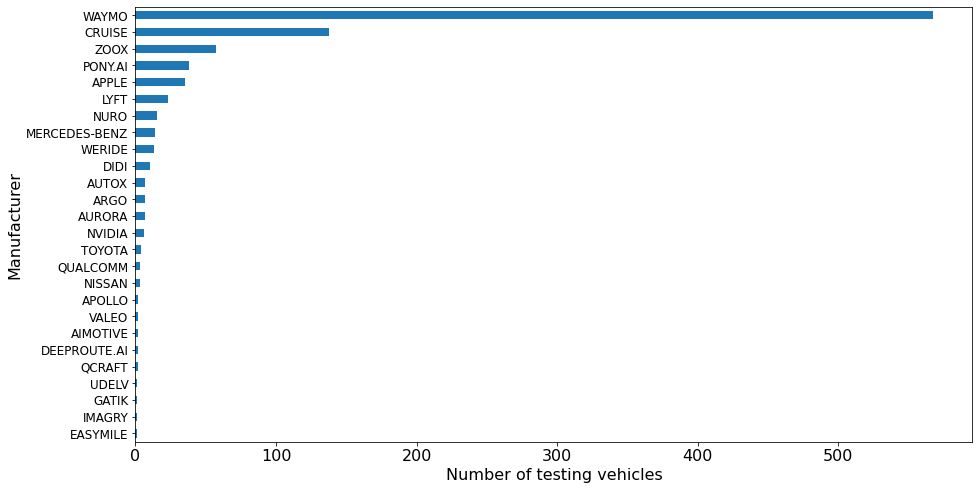

In [229]:
disengagement.plot(kind='barh', x='Manufacturer', y='Number of Testing Vehicles', figsize=(15, 8), legend=False)
plt.xlabel('Number of testing vehicles', fontsize = 16)
plt.ylabel('Manufacturer',fontsize = 16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=12)
plt.savefig('company_num_testing_vehicles.jpeg', transparent=True)

In [236]:
### sum annual disengagement and total miles by company and calculate miles per disengagement directly

df = pd.read_csv('2021-Autonomous-Mileage-Reports.csv', usecols=['Manufacturer', 'VIN NUMBER', 'Annual Total of Disengagements', 'ANNUAL TOTAL'])
df['ANNUAL TOTAL'] = [item.replace(' ', '') for item in df['ANNUAL TOTAL']]
df['ANNUAL TOTAL'] = [item.replace(',', '') for item in df['ANNUAL TOTAL']]
df['ANNUAL TOTAL'] = df['ANNUAL TOTAL'].astype('float')
df_agg = df.groupby(['Manufacturer']).agg({'VIN NUMBER': 'count', 'Annual Total of Disengagements': 'sum', 'ANNUAL TOTAL': 'sum'})
df_agg['miles per disengagement'] = round(df_agg['ANNUAL TOTAL']/df_agg['Annual Total of Disengagements'])
df_agg.head()

,VIN NUMBER,Annual Total of Disengagements,ANNUAL TOTAL,miles per disengagement
Manufacturer,,,,
AIMOTIVE INC.,2,106,2976.00,28.0
APOLLO AUTONOMOUS DRIVING USA LLC,5,1,1467.50,1468.0
APPLE INC.,37,663,13272.00,20.0
"ARGO AI, LLC",13,1,36733.87,36734.0
"AURORA OPERATIONS, INC.",7,9,12647.07,1405.0


/var/folders/rh/5tkty3715h119sm4y35zw4dr0000gn/T/ipykernel_92945/141288482.py:9: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0, 100000)
/var/folders/rh/5tkty3715h119sm4y35zw4dr0000gn/T/ipykernel_92945/141288482.py:10: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0, 1e07)


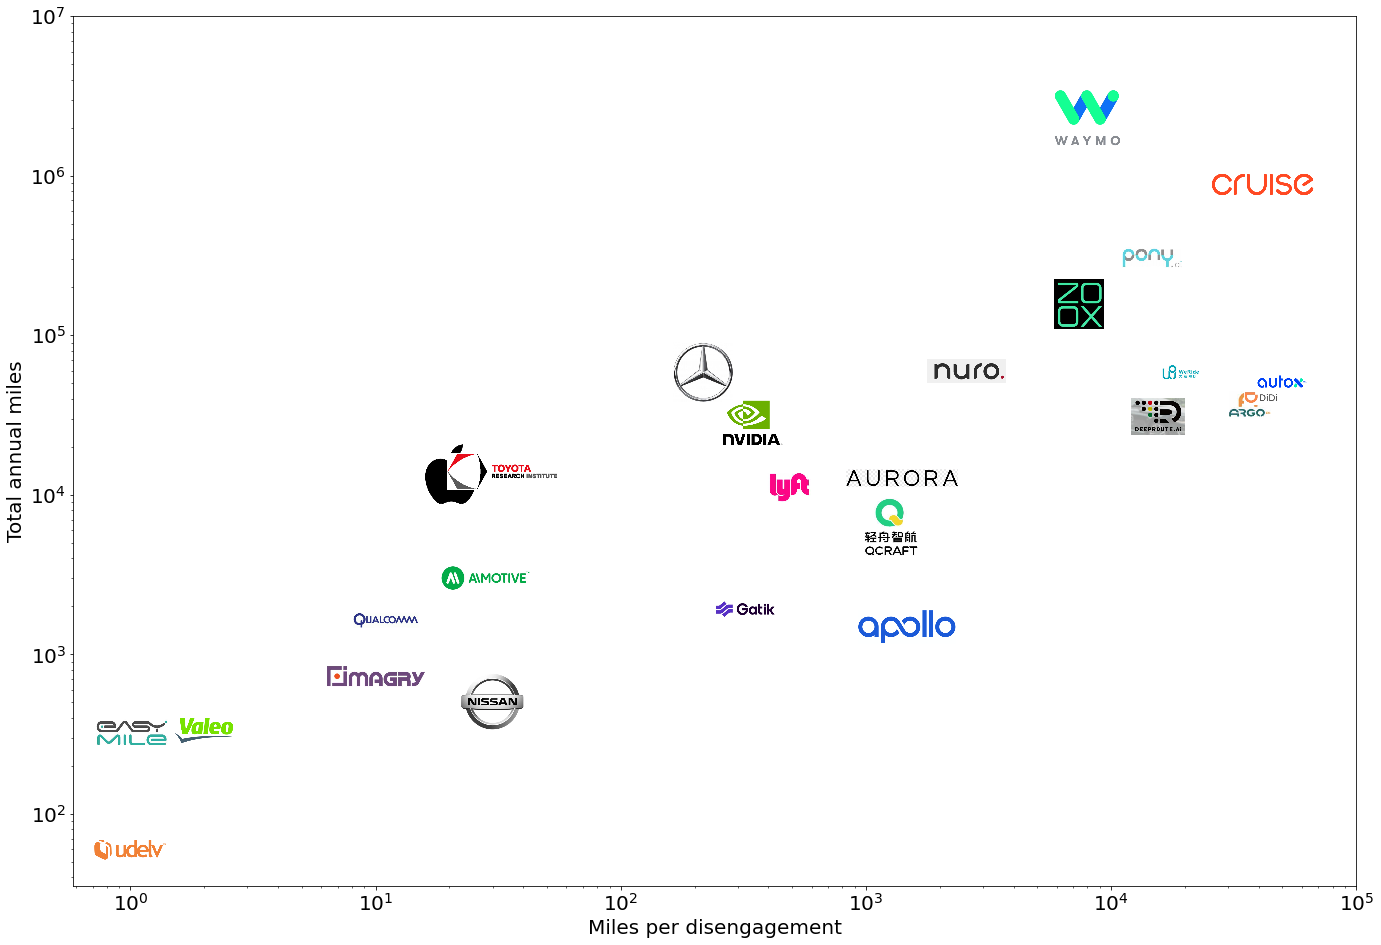

In [242]:
x = df_agg['miles per disengagement']
y = df_agg['ANNUAL TOTAL']
image_path = ['image/' + idx + '.png' for idx in list(df_agg.index)]
fig, ax = plt.subplots(figsize=(23,16))
imscatter(x, y, image_path, zoom=.2, ax=ax)
ax.scatter(x, y)
plt.xscale('log')
plt.yscale('log')
plt.xlim(0, 100000)
plt.ylim(0, 1e07)
plt.xlabel('Miles per disengagement', fontsize=20)
plt.ylabel('Total annual miles', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [243]:
fig.savefig('company_AV_development.jpeg', transparent=True)

In [ ]:
### Calculate total testing miles of 